# From Fish to Classifiers: A Practical Guide to Bayesian Decision Theory and Naïve Bayes


In the world of machine learning, not all algorithms need deep neural networks or gigabytes of data to shine. One of the oldest, simplest, and most powerful paradigms is rooted in *Bayesian decision theory*, a statistical approach to classification that underpins algorithms like the **Bayes classifier**, **Gaussian Mixture Models (GMMs)**, and the ever-popular **Naïve Bayes** classifier.

This notebook walks you through these ideas with real-world analogies, the necessary math, and Python code that you can immediately test.


## 1. Bayesian Decision Theory: The Fish Story


Imagine you're sorting fish—some are salmon, some are sea bass. Your goal is to build a rule that automatically classifies a fish based on its features, such as color or lightness.

Each fish belongs to a class:
- ω₁ = sea bass
- ω₂ = salmon

Bayesian decision theory starts by assuming that each class has a prior probability, $ p(\omega_1) $ and $ p(\omega_2) $, representing the likelihood of encountering each fish type without additional information. If $ p(\omega_1) = p(\omega_2) = 0.5 $, both classes are equally likely. In practice, prior probabilities are often estimated from data or domain knowledge.
- **Prior probabilities**: how likely a fish is to be from each class before any data
- **Class-conditional distributions**: how feature values like "lightness" are distributed per class

When additional information, such as a feature like lightness measurement ($ x $), is available, Bayesian Decision Theory incorporates this evidence to compute the posterior probability, $ p(\omega_j | x) $, which updates the likelihood of each class given the feature. The decision rule then assigns the sample to the class with the highest posterior probability.

To compute the **posterior probability**:

$$
p(\omega_j | x) = \frac{p(x | \omega_j) p(\omega_j)}{p(x)}
$$

where:
- $ p(\omega_j | x) $: Posterior probability of class $\omega_j$ given feature $ x $.
- $ p(x | \omega_j) $: Class-conditional probability density, describing the distribution of feature $ x $ for class $\omega_j$.
- $ p(\omega_j) $: Prior probability of class $\omega_j$.
- $ p(x) $: Evidence, computed as $ p(x) = \sum_{j=1}^c p(x | \omega_j) p(\omega_j) $, where $ c $ is the number of classes.

For a two-class problem, the decision rule is:

- Choose $\omega_1$ if $ p(\omega_1 | x) > p(\omega_2 | x) $.
- Choose $\omega_2$ otherwise.

Since $ p(x) $ is a common scaling factor, the decision can be simplified to comparing $ p(x | \omega_1) p(\omega_1) $ and $ p(x | \omega_2) p(\omega_2) $.
The **Bayes decision rule** picks the class with the highest posterior.

### Example: Fish Classification

Suppose we have prior probabilities $ p(\omega_1) = 2/3 $ (sea bass) and $ p(\omega_2) = 1/3 $ (salmon). Given a lightness measurement $ x $, we compute the posterior probabilities using the class-conditional densities functions $ p(x | \omega_1) $ and $ p(x | \omega_2) $, which describe the lightness distribution for each fish type.


## Generalizing to Multiple Features and Classes

For real-world applications, we often deal with multiple features (forming a feature vector $\mathbf{x}$) and multiple classes ($\omega_1, \omega_2, \ldots, \omega_c$). The posterior probability becomes:

$$ p(\omega_j | \mathbf{x}) = \frac{p(\mathbf{x} | \omega_j) p(\omega_j)}{p(\mathbf{x})} $$

where $ p(\mathbf{x}) = \sum_{j=1}^c p(\mathbf{x} | \omega_j) p(\omega_j) $. The classifier assigns $\mathbf{x}$ to the class $\omega_i$ that maximizes the discriminant function:

$$ g_i(\mathbf{x}) = p(\omega_i | \mathbf{x}) $$

Alternative discriminant functions include:

$$ g_i(\mathbf{x}) = p(\mathbf{x} | \omega_i) p(\omega_i) $$
$$ g_i(\mathbf{x}) = \log p(\mathbf{x} | \omega_i) + \log p(\omega_i) $$

These are equivalent for classification, as they preserve the order of probabilities.

## 2. Discriminant Functions and Posterior Probabilities


In more complex settings, fish might be described by a feature vector **x** (e.g., color, length, lightness). Bayesian classifiers generalize to multiple classes and use **discriminant functions**:

$$
g_i(x) = p(x|\omega_i) \cdot p(\omega_i)
$$

Or in log form for stability:
$$
g_i(x) = \log p(x|\omega_i) + \log p(\omega_i)
$$


##  3. Gaussian Assumption and Parameter Estimation

In [8]:

import numpy as np

def estimate_parameters(X):
    mu = X.mean(axis=0)
    sigma = np.cov(X, rowvar=False)
    return mu, sigma


## 4. Gaussian Mixture Models (GMMs)


A GMM models data as a **mixture of Gaussians**:

$$
p(x) = \sum_{i=1}^{m} \alpha_i \cdot \mathcal{N}(x | \mu_i, \Sigma_i)
$$

We use the EM algorithm to estimate parameters:
- **E-Step**: Compute responsibilities
- **M-Step**: Update $ \mu_i, \Sigma_i, \alpha_i $


### 4.1 Generate Fake Data

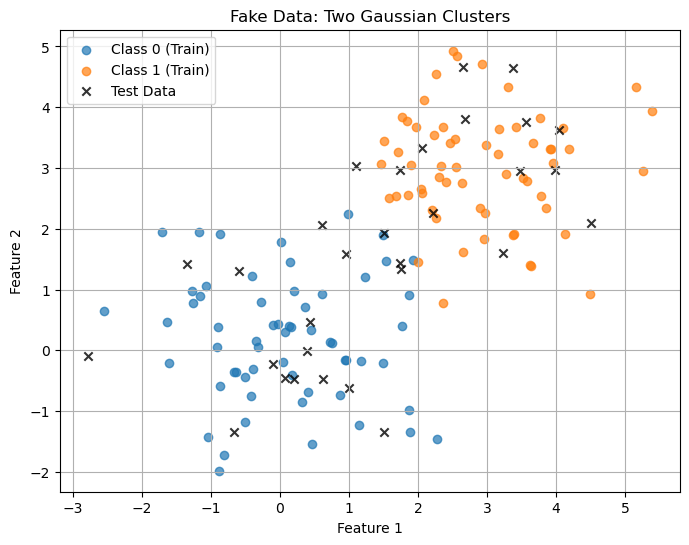

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(0)

# Generate two Gaussian clusters for binary classification
n_train = 120
n_test = 30
n_features = 2

# Class 0: centered at (0, 0)
X0 = np.random.randn(n_train // 2, n_features) + np.array([0, 0])
y0 = np.zeros(n_train // 2)

# Class 1: centered at (3, 3)
X1 = np.random.randn(n_train // 2, n_features) + np.array([3, 3])
y1 = np.ones(n_train // 2)

# Combine for training set
X_train = np.vstack([X0, X1])
y_train = np.hstack([y0, y1])

# Shuffle training set
idx = np.random.permutation(n_train)
X_train = X_train[idx]
y_train = y_train[idx]

# Test set: similar distribution
X0_test = np.random.randn(n_test // 2, n_features) + np.array([0, 0])
X1_test = np.random.randn(n_test // 2, n_features) + np.array([3, 3])
X_test = np.vstack([X0_test, X1_test])
# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0 (Train)', alpha=0.7)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1 (Train)', alpha=0.7)

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker='x', label='Test Data', alpha=0.8)

plt.title('Fake Data: Two Gaussian Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [14]:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X_train)

predicted_probs = gmm.predict_proba(X_test)
print(predicted_probs[:10])

[[4.88045213e-01 5.11954787e-01]
 [9.99215332e-01 7.84667669e-04]
 [6.25006965e-04 9.99374993e-01]
 [3.96076147e-01 6.03923853e-01]
 [9.99757532e-01 2.42468242e-04]
 [9.96151494e-01 3.84850585e-03]
 [9.98285303e-01 1.71469745e-03]
 [9.99994502e-01 5.49821165e-06]
 [9.99708921e-01 2.91078549e-04]
 [9.92589339e-01 7.41066134e-03]]


### Result Interpretation
`predict_proba` in `GaussianMixture` returns the predicted probability (**responsibility**) that each sample in X_test belongs to each Gaussian component in the mixture.

- Each row in predicted_probs corresponds to a sample in X_test.
- Each column corresponds to a component (here, 2 columns for 2 components).
- The values are probabilities (between 0 and 1) and each row sums to 1.

## 5. Naïve Bayes Classifiers

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Gaussian NB example
gnb = GaussianNB()
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
print(preds)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1.]


## 5.1 Classic Naive Bayes Example: Should John Play Golf?

The "Play Golf" dataset is a classic example for illustrating Naive Bayes classification. The goal is to predict whether John will play golf based on weather conditions.

**Features:**
- Outlook: Sunny, Overcast, Rain
- Temperature: Hot, Mild, Cool
- Humidity: High, Normal
- Wind: Weak, Strong

![nb-table](./nb-table.png)

**Target:**
- PlayGolf: Yes, No

Let's see how Naive Bayes can be used for this problem.

In [1]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Classic Play Golf dataset
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot',   'Hot',   'Hot',      'Mild','Cool', 'Cool',  'Cool',     'Mild',  'Cool',  'Mild', 'Mild',  'Mild',     'Hot',      'Mild'],
    'Humidity':   ['High',  'High',  'High',     'High','Normal','Normal','Normal',  'High',  'Normal','Normal','Normal','High',     'Normal',   'High'],
    'Wind':       ['Weak',  'Strong','Weak',     'Weak','Weak',  'Strong','Strong',  'Weak',  'Weak',  'Weak', 'Strong','Strong',   'Weak',     'Strong'],
    'PlayGolf':   ['No',    'No',    'Yes',      'Yes', 'Yes',  'No',    'Yes',      'No',    'Yes',   'Yes',  'Yes',   'Yes',      'Yes',      'No']
}

df = pd.DataFrame(data)

# Encode categorical features
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

df['Outlook_enc'] = le_outlook.fit_transform(df['Outlook'])
df['Temperature_enc'] = le_temp.fit_transform(df['Temperature'])
df['Humidity_enc'] = le_humidity.fit_transform(df['Humidity'])
df['Wind_enc'] = le_wind.fit_transform(df['Wind'])
df['PlayGolf_enc'] = le_play.fit_transform(df['PlayGolf'])

X = df[['Outlook_enc', 'Temperature_enc', 'Humidity_enc', 'Wind_enc']]
y = df['PlayGolf_enc']

# Train Naive Bayes classifier
model = CategoricalNB()
model.fit(X, y)

# Predict for a new day: Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong
sample = [[le_outlook.transform(['Sunny'])[0],
           le_temp.transform(['Cool'])[0],
           le_humidity.transform(['High'])[0],
           le_wind.transform(['Strong'])[0]]]

pred = model.predict(sample)
print("Prediction for [Sunny, Cool, High, Strong]:", le_play.inverse_transform(pred)[0])

Prediction for [Sunny, Cool, High, Strong]: No


/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


**Interpretation:**  
The model predicts whether John will play golf given the weather conditions. You can change the sample input to try

## 5.2 Solving the "Play Golf" Example by Hand

To understand how Naive Bayes works, let's manually compute the probability that John will play golf given the weather:  
**Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong**

### Step 1: Calculate Prior Probabilities

Count the number of "Yes" and "No" in the PlayGolf column:

- $P(\text{Yes}) = \frac{\text{Number of Yes}}{\text{Total}} = \frac{9}{14}$
- $P(\text{No}) = \frac{\text{Number of No}}{\text{Total}} = \frac{5}{14}$

### Step 2: Calculate Likelihoods

For each feature, calculate the probability of the feature value given PlayGolf=Yes and PlayGolf=No.

#### Example: $P(\text{Outlook=Sunny}|\text{Yes})$

- Number of "Sunny" days when PlayGolf=Yes: 2
- Total "Yes": 9  
$\Rightarrow P(\text{Sunny}|\text{Yes}) = \frac{2}{9}$

- Number of "Sunny" days when PlayGolf=No: 3
- Total "No": 5  
$\Rightarrow P(\text{Sunny}|\text{No}) = \frac{3}{5}$

Repeat for all features:

| Feature         | Value   | $P(\cdot|\text{Yes})$ | $P(\cdot|\text{No})$ |
|-----------------|---------|----------------------|----------------------|
| Outlook         | Sunny   | 2/9                  | 3/5                  |
| Temperature     | Cool    | 3/9                  | 1/5                  |
| Humidity        | High    | 3/9                  | 4/5                  |
| Wind            | Strong  | 3/9                  | 3/5                  |

### Step 3: Apply Naive Bayes Formula

Calculate the unnormalized probabilities:

- For "Yes":
  $$
  P(\text{Yes}) \times P(\text{Sunny}|\text{Yes}) \times P(\text{Cool}|\text{Yes}) \times P(\text{High}|\text{Yes}) \times P(\text{Strong}|\text{Yes}) \\
  = \frac{9}{14} \times \frac{2}{9} \times \frac{3}{9} \times \frac{3}{9} \times \frac{3}{9}
  $$

- For "No":
  $$
  P(\text{No}) \times P(\text{Sunny}|\text{No}) \times P(\text{Cool}|\text{No}) \times P(\text{High}|\text{No}) \times P(\text{Strong}|\text{No}) \\
  = \frac{5}{14} \times \frac{3}{5} \times \frac{1}{5} \times \frac{4}{5} \times \frac{3}{5}
  $$

### Step 4: Compute and Compare

- For "Yes":
  $$
  \frac{9}{14} \times \frac{2}{9} \times \frac{3}{9} \times \frac{3}{9} \times \frac{3}{9} = \frac{2 \times 3 \times 3 \times 3}{14 \times 9 \times 9 \times 9} = \frac{54}{10206} \approx 0.0053
  $$

- For "No":
  $$
  \frac{5}{14} \times \frac{3}{5} \times \frac{1}{5} \times \frac{4}{5} \times \frac{3}{5} = \frac{3 \times 1 \times 4 \times 3}{14 \times 5 \times 5 \times 5} = \frac{36}{8750} \approx 0.0041
  $$

### Step 5: Normalize (Optional)

Since we only need to compare, the class with the higher value is the prediction.

**Conclusion:**  
Since $0.0053 > 0.0041$, predict **Yes** (John will play golf).

---

**Note:**  
If any probability is zero, Laplace smoothing can be used to avoid multiplying by zero.

## 6. Visualizing 3D GMM Clusters

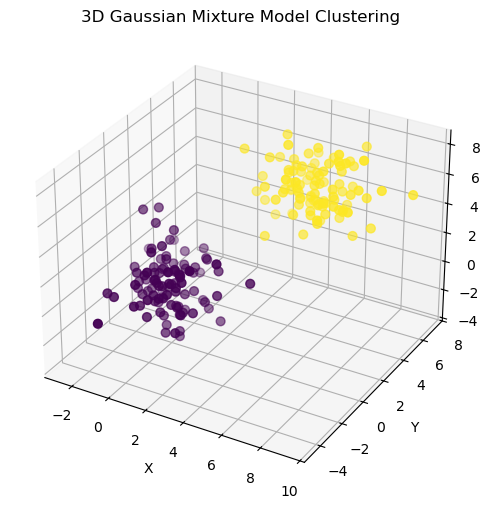

In [6]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic 3D data
np.random.seed(42)
mean1 = [0, 0, 0]
cov1 = np.diag([1, 2, 3])
data1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [5, 5, 5]
cov2 = np.diag([2, 1, 2])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

X = np.vstack((data1, data2))

# Fit GMM
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
labels = gmm.predict(X)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=40)
ax.set_title('3D Gaussian Mixture Model Clustering')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
